<a href="https://colab.research.google.com/github/aqsajan/AThousandWords/blob/main/DINO%2BGDINOTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Borrowing heavily from https://github.com/IDEA-Research/DINO/blob/main/inference_and_visualization.ipynb
# and https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/zero-shot-object-detection-with-grounding-dino.ipynb

!git clone https://github.com/IDEA-Research/DINO.git

Cloning into 'DINO'...
remote: Enumerating objects: 433, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 433 (delta 88), reused 51 (delta 51), pack-reused 303
Receiving objects: 100% (433/433), 13.44 MiB | 16.87 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [ ]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 369 (delta 8), reused 13 (delta 3), pack-reused 336
Receiving objects: 100% (369/369), 12.74 MiB | 17.87 MiB/s, done.
Resolving deltas: 100% (170/170), done.


In [ ]:
!nvidia-smi
# In case of any problems navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save. Note that if you do this you have to rerun the cells above

Tue Jun 20 22:05:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cd DINO

/content/DINO


In [ ]:
%pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-yd5qupk5/pycocotools_acec3fc0329845d5b88b8e4e27dd01f0
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-yd5qupk5/pycocotools_acec3fc0329845d5b88b8e4e27dd01f0
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-yd5qupk5/panopticapi_345edafaf79d4944869d82af1b452c4f
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-yd5qupk5/panopticapi_345edafaf79d4944869d82af1b452c4f
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
     

In [ ]:
cd models/dino/ops

/content/DINO/models/dino/ops


In [ ]:
%pip install ninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 9.1 MB/s eta 0:00:00


In [ ]:
!sh make.sh

running build
running build_py
creating build
creating build/lib.linux-x86_64-cpython-310
creating build/lib.linux-x86_64-cpython-310/functions
copying functions/ms_deform_attn_func.py -> build/lib.linux-x86_64-cpython-310/functions
copying functions/__init__.py -> build/lib.linux-x86_64-cpython-310/functions
creating build/lib.linux-x86_64-cpython-310/modules
copying modules/__init__.py -> build/lib.linux-x86_64-cpython-310/modules
copying modules/ms_deform_attn.py -> build/lib.linux-x86_64-cpython-310/modules
running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:398: UserWarning: There are no x86_64-linux-gnu-g++ version bounds defined for CUDA version 11.8
  warnings.warn(f'There are no {compiler_name} version bounds defined for CUDA version {cuda_str_version}')
building 'MultiScaleDeformableAttention' extension
creating /content/DINO/models/dino/ops/build/temp.linux-x86_64-cpython-310
creating /content/DINO/models/dino/ops/build/temp.linux-x86_64-cp

In [ ]:
!python setup.py build install # install DINO packages

running build
running build_py
running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:398: UserWarning: There are no x86_64-linux-gnu-g++ version bounds defined for CUDA version 11.8
  warnings.warn(f'There are no {compiler_name} version bounds defined for CUDA version {cuda_str_version}')
building 'MultiScaleDeformableAttention' extension
Emitting ninja build file /content/DINO/models/dino/ops/build/temp.linux-x86_64-cpython-310/build.ninja...
Compiling objects...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 /content/DINO/models/dino/ops/build/temp.linux-x86_64-cpython-310/content/DINO/models/dino/ops/src/cpu/ms_deform_attn_cpu.o /content/DINO/models/dino/ops/build/temp.linux-x86_64-cpython-310/content/DINO/models/dino/ops/src/cuda/ms_deform_attn_cuda.o /

In [ ]:
# gosh that's a lot of warning messages
!python test.py # unit testing for dino to make sure everything got installed ok

* True check_forward_equal_with_pytorch_double: max_abs_err 8.67e-19 max_rel_err 2.35e-16
* True check_forward_equal_with_pytorch_float: max_abs_err 4.66e-10 max_rel_err 1.13e-07
* True check_gradient_numerical(D=30)
* True check_gradient_numerical(D=32)
* True check_gradient_numerical(D=64)
* True check_gradient_numerical(D=71)
* True check_gradient_numerical(D=1025)
Traceback (most recent call last):
  File "/content/DINO/models/dino/ops/test.py", line 86, in <module>
    check_gradient_numerical(channels, True, True, True)
  File "/content/DINO/models/dino/ops/test.py", line 76, in check_gradient_numerical
    gradok = gradcheck(func, (value.double(), shapes, level_start_index, sampling_locations.double(), attention_weights.double(), im2col_step))
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/gradcheck.py", line 1476, in gradcheck
    return _gradcheck_helper(**args)
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/gradcheck.py", line 1490, in _gradche

In [9]:
# close enough
# Next: Download these and put them in your Google Drive
# https://drive.google.com/drive/folders/1qD5m1NmK0kjE5hh-G17XUX751WsEG-h_
# checkpoint0011_4scale.pth
# checkpoint0011_4scale_swin.pth
# Also, upload COCO 2017 to your drive from https://cocodataset.org/#download
# coco val folder and coco annotations folder need to go in the same folder

from google.colab import drive

gdrive_dir = '/content/gdrive/'

drive.mount(gdrive_dir, force_remount=True)

# click the dialog boxes to continue

Mounted at /content/gdrive/


In [ ]:
import os

coco_dir = os.path.join(gdrive_dir, 'My Drive', 'coco')
#coco_annotations = os.path.join(gdrive_dir, 'My Drive', 'annotations', 'instances_val2017.json')
#coco_val_dir = os.path.join(gdrive_dir, 'My Drive', 'val2017')

dino_resnet = os.path.join(gdrive_dir, 'My Drive', 'checkpoint0011_4scale.pth')
dino_swin = os.path.join(gdrive_dir, 'My Drive', 'checkpoint0011_4scale_swin.pth')

In [ ]:
cd DINO

/content/DINO


In [ ]:
# using code from DINO demo to show how to run it on one image
# if you get the ModuleNotFound: MultiScaleDeformableAttention, restart your runtime and rerun from google colab block

import torch, json
import numpy as np

from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops

model_config_path = 'config/DINO/DINO_4scale.py'

args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(dino_resnet, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

with open('util/coco_id2name.json') as f:
    id2name = json.load(f)
    id2name = {int(k):v for k,v in id2name.items()}

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 246MB/s]


In [ ]:
args.dataset_file = 'coco'
args.coco_path = coco_dir # the path of coco
args.fix_size = False

dataset_val = build_dataset(image_set='val', args=args)

data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=1.16s)
creating index...
index created!


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


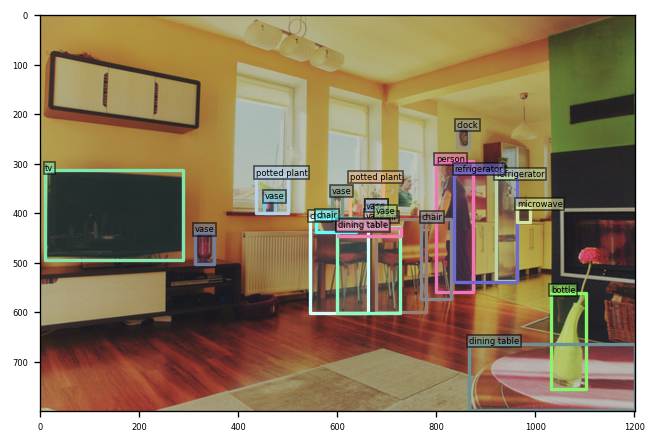

In [ ]:
output = model.cuda()(image[None].cuda()) # visualize the output of the model on a coco image
output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

threshold = 0.3 # set a confidence threshold

scores = output['scores']
labels = output['labels']
boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
select_mask = scores > thershold

box_label = [id2name[int(item)] for item in labels[select_mask]]
pred_dict = {
    'boxes': boxes[select_mask],
    'size': targets['size'],
    'box_label': box_label
}
vslzr.visualize(image, pred_dict, savedir=None)

In [ ]:
# use the inboard testing script to run on all the coco data

if not os.path.exists('logs'):
  os.mkdir('logs')

In [ ]:
!python main.py --output_dir logs/test1 -c config/DINO/DINO_4scale.py --coco_path '/content/gdrive/My Drive/coco' --eval --save_log --resume '/content/gdrive/My Drive/checkpoint0011_4scale.pth' --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0

In [ ]:
# Now test SWIN

!python main.py --output_dir logs/test2 -c config/DINO/DINO_4scale_swin.py --coco_path '/content/gdrive/My Drive/coco' --eval --save_log --resume '/content/gdrive/My Drive/checkpoint0011_4scale_swin.pth' --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0

Not using distributed mode
Loading config file from config/DINO/DINO_4scale_swin.py
[06/20 22:17:55.686]: git:
  sha: 3ffda400b0f1d4a919fbe2a9cf567e79d210ffde, status: clean, branch: main

[06/20 22:17:55.686]: Command: main.py --output_dir logs/test2 -c config/DINO/DINO_4scale_swin.py --coco_path /content/gdrive/My Drive/coco --eval --save_log --resume /content/gdrive/My Drive/checkpoint0011_4scale_swin.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[06/20 22:17:55.687]: Full config saved to logs/test2/config_args_all.json
[06/20 22:17:55.687]: world size: 1
[06/20 22:17:55.687]: rank: 0
[06/20 22:17:55.687]: local_rank: 0
[06/20 22:17:55.687]: args: Namespace(config_file='config/DINO/DINO_4scale_swin.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/gdrive/My Drive/coco', coco_p

Grounding DINO

In [1]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 369 (delta 8), reused 13 (delta 3), pack-reused 336
Receiving objects: 100% (369/369), 12.74 MiB | 8.78 MiB/s, done.
Resolving deltas: 100% (170/170), done.


In [2]:
cd ..

/


In [3]:
cd content/GroundingDINO

/content/GroundingDINO


In [4]:
mkdir weights

In [5]:
!pip install -e . # install groundingdino

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0
  Running setup.py develop for groundingdino


In [6]:
# Ordinarily, you would just run the below:

#!python demo/test_ap_on_coco.py -c config/GroundingDINO_SwinT_OGC.py -p weights\groundingdino_swint_ogc.pth --anno_path 'content/drive/My Drive/coco/annotations/instances_val2017.json' --image_dir 'content/drive/My Drive/coco/val_2017'

# but they have a typo in test_ap_on_coco, so I am reproducing that below, with the typo fixed

import argparse
import os
import sys
import time

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, DistributedSampler

from groundingdino.models import build_model
import groundingdino.datasets.transforms as T
from groundingdino.util import box_ops, get_tokenlizer
from groundingdino.util.misc import clean_state_dict, collate_fn
from groundingdino.util.slconfig import SLConfig

# from torchvision.datasets import CocoDetection
import torchvision

from groundingdino.util.vl_utils import build_captions_and_token_span, create_positive_map_from_span
from groundingdino.datasets.cocogrounding_eval import CocoGroundingEvaluator

def load_model(model_config_path: str, model_checkpoint_path: str, device: str = "cuda"):
    args = SLConfig.fromfile(model_config_path)
    args.device = device
    model = build_model(args)
    checkpoint = torch.load(model_checkpoint_path, map_location="cpu")
    model.load_state_dict(clean_state_dict(checkpoint["model"]), strict=False)  # the typo was here.  it's gone now.
    model.eval()
    return model


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, ann_file, transforms):
        super().__init__(img_folder, ann_file)
        self._transforms = transforms

    def __getitem__(self, idx):
        img, target = super().__getitem__(idx)  # target: list

        # import ipdb; ipdb.set_trace()

        w, h = img.size
        boxes = [obj["bbox"] for obj in target]
        boxes = torch.as_tensor(boxes, dtype=torch.float32).reshape(-1, 4)
        boxes[:, 2:] += boxes[:, :2]  # xywh -> xyxy
        boxes[:, 0::2].clamp_(min=0, max=w)
        boxes[:, 1::2].clamp_(min=0, max=h)
        # filt invalid boxes/masks/keypoints
        keep = (boxes[:, 3] > boxes[:, 1]) & (boxes[:, 2] > boxes[:, 0])
        boxes = boxes[keep]

        target_new = {}
        image_id = self.ids[idx]
        target_new["image_id"] = image_id
        target_new["boxes"] = boxes
        target_new["orig_size"] = torch.as_tensor([int(h), int(w)])

        if self._transforms is not None:
            img, target = self._transforms(img, target_new)

        return img, target


class PostProcessCocoGrounding(nn.Module):
    """ This module converts the model's output into the format expected by the coco api"""

    def __init__(self, num_select=300, coco_api=None, tokenlizer=None) -> None:
        super().__init__()
        self.num_select = num_select

        assert coco_api is not None
        category_dict = coco_api.dataset['categories']
        cat_list = [item['name'] for item in category_dict]
        captions, cat2tokenspan = build_captions_and_token_span(cat_list, True)
        tokenspanlist = [cat2tokenspan[cat] for cat in cat_list]
        positive_map = create_positive_map_from_span(
            tokenlizer(captions), tokenspanlist)  # 80, 256. normed

        id_map = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 13, 12: 14, 13: 15, 14: 16, 15: 17, 16: 18, 17: 19, 18: 20, 19: 21, 20: 22, 21: 23, 22: 24, 23: 25, 24: 27, 25: 28, 26: 31, 27: 32, 28: 33, 29: 34, 30: 35, 31: 36, 32: 37, 33: 38, 34: 39, 35: 40, 36: 41, 37: 42, 38: 43, 39: 44, 40: 46,
                  41: 47, 42: 48, 43: 49, 44: 50, 45: 51, 46: 52, 47: 53, 48: 54, 49: 55, 50: 56, 51: 57, 52: 58, 53: 59, 54: 60, 55: 61, 56: 62, 57: 63, 58: 64, 59: 65, 60: 67, 61: 70, 62: 72, 63: 73, 64: 74, 65: 75, 66: 76, 67: 77, 68: 78, 69: 79, 70: 80, 71: 81, 72: 82, 73: 84, 74: 85, 75: 86, 76: 87, 77: 88, 78: 89, 79: 90}

        # build a mapping from label_id to pos_map
        new_pos_map = torch.zeros((91, 256))
        for k, v in id_map.items():
            new_pos_map[v] = positive_map[k]
        self.positive_map = new_pos_map

    @torch.no_grad()
    def forward(self, outputs, target_sizes, not_to_xyxy=False):
        """ Perform the computation
        Parameters:
            outputs: raw outputs of the model
            target_sizes: tensor of dimension [batch_size x 2] containing the size of each images of the batch
                          For evaluation, this must be the original image size (before any data augmentation)
                          For visualization, this should be the image size after data augment, but before padding
        """
        num_select = self.num_select
        out_logits, out_bbox = outputs['pred_logits'], outputs['pred_boxes']

        # pos map to logit
        prob_to_token = out_logits.sigmoid()  # bs, 100, 256
        pos_maps = self.positive_map.to(prob_to_token.device)
        # (bs, 100, 256) @ (91, 256).T -> (bs, 100, 91)
        prob_to_label = prob_to_token @ pos_maps.T

        # if os.environ.get('IPDB_SHILONG_DEBUG', None) == 'INFO':
        #     import ipdb; ipdb.set_trace()

        assert len(out_logits) == len(target_sizes)
        assert target_sizes.shape[1] == 2

        prob = prob_to_label
        topk_values, topk_indexes = torch.topk(
            prob.view(out_logits.shape[0], -1), num_select, dim=1)
        scores = topk_values
        topk_boxes = topk_indexes // prob.shape[2]
        labels = topk_indexes % prob.shape[2]

        if not_to_xyxy:
            boxes = out_bbox
        else:
            boxes = box_ops.box_cxcywh_to_xyxy(out_bbox)

        boxes = torch.gather(
            boxes, 1, topk_boxes.unsqueeze(-1).repeat(1, 1, 4))

        # and from relative [0, 1] to absolute [0, height] coordinates
        img_h, img_w = target_sizes.unbind(1)
        scale_fct = torch.stack([img_w, img_h, img_w, img_h], dim=1)
        boxes = boxes * scale_fct[:, None, :]

        results = [{'scores': s, 'labels': l, 'boxes': b}
                   for s, l, b in zip(scores, labels, boxes)]

        return results


def test_ap_on_coco(args):
    # config
    cfg = SLConfig.fromfile(args['config_file']) # couldn't figure out how argparser works so just rewrote this too

    # build model
    model = load_model(args['config_file'], args['checkpoint_path'])
    model = model.to(args['device'])
    model = model.eval()

    # build dataloader
    transform = T.Compose(
        [
            T.RandomResize([800], max_size=1333),
            T.ToTensor(),
            T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )
    dataset = CocoDetection(
        args['image_dir'], args['anno_path'], transforms=transform)
    data_loader = DataLoader(
        dataset, batch_size=1, shuffle=False, num_workers=args['num_workers'], collate_fn=collate_fn)

    # build post processor
    tokenlizer = get_tokenlizer.get_tokenlizer(cfg.text_encoder_type)
    postprocessor = PostProcessCocoGrounding(
        coco_api=dataset.coco, tokenlizer=tokenlizer)

    # build evaluator
    evaluator = CocoGroundingEvaluator(
        dataset.coco, iou_types=("bbox",), useCats=True)

    # build captions
    category_dict = dataset.coco.dataset['categories']
    cat_list = [item['name'] for item in category_dict]
    caption = " . ".join(cat_list) + ' .'
    print("Input text prompt:", caption)

    # run inference
    start = time.time()
    for i, (images, targets) in enumerate(data_loader):
        # get images and captions
        images = images.tensors.to(args['device'])
        bs = images.shape[0]
        input_captions = [caption] * bs

        # feed to the model
        outputs = model(images, captions=input_captions)

        orig_target_sizes = torch.stack(
            [t["orig_size"] for t in targets], dim=0).to(images.device)
        results = postprocessor(outputs, orig_target_sizes)
        cocogrounding_res = {
            target["image_id"]: output for target, output in zip(targets, results)}
        evaluator.update(cocogrounding_res)

        if (i+1) % 30 == 0:
            used_time = time.time() - start
            eta = len(data_loader) / (i+1e-5) * used_time - used_time
            print(
                f"processed {i}/{len(data_loader)} images. time: {used_time:.2f}s, ETA: {eta:.2f}s")

    evaluator.synchronize_between_processes()
    evaluator.accumulate()
    evaluator.summarize()

    print("Final results:", evaluator.coco_eval["bbox"].stats.tolist())


#parser = argparse.ArgumentParser(
#        "Grounding DINO eval on COCO", add_help=True)
    # load model
#    parser.add_argument("--config_file", "-c", type=str,
#                        required=True, help="path to config file")
#    parser.add_argument(
#        "--checkpoint_path", "-p", type=str, required=True, help="path to checkpoint file"
#    )
#    parser.add_argument("--device", type=str, default="cuda",
#                        help="running device (default: cuda)")

    # post processing
#    parser.add_argument("--num_select", type=int, default=300,
#                        help="number of topk to select")

    # coco info
 #   parser.add_argument("--anno_path", type=str,
#                        required=True, help="coco root")
#    parser.add_argument("--image_dir", type=str,
 #                       required=True, help="coco image dir")
 #   parser.add_argument("--num_workers", type=int, default=4,
 #                       help="number of workers for dataloader")
#    args = parser.parse_args()

#    main(args)


In [10]:
#parser = argparse.ArgumentParser()
#parser.add_argument("--anno_path 'content/drive/My Drive/coco/annotations/instances_val2017.json'")
#parser.add_argument("--image_dir 'content/drive/My Drive/coco/val_2017'")
#parser.add_argument("--checkpoint_path 'content/drive/My Drive/groundingdino_swint_ogc.pth'")
#parser.add_argument("--config_file 'config/GroundingDINO_SwinT_OGC.py'")
#parser.add_argument("--num_workers 4")
#parser.add_argument("--num_select 300")
#parser.add_argument("--device 'cuda'")

#args = parser.parse_args()


args = {'anno_path': os.path.join(gdrive_dir, 'My Drive', 'coco', 'annotations', 'instances_val2017.json'), 'image_dir': os.path.join(gdrive_dir, 'My Drive', 'coco', 'val2017'),
        'checkpoint_path': os.path.join(gdrive_dir, 'My Drive', 'groundingdino_swint_ogc.pth'), 'config_file': 'config/GroundingDINO_SwinT_OGC.py',
        'num_workers': 4, 'num_select': 300, 'device': 'cuda'}

In [13]:
cd groundingdino

/content/GroundingDINO/groundingdino


In [ ]:
ls

 checkpoint0011_4scale.pth        coded_nodes_total.csv
 checkpoint0011_4scale_swin.pth  'Colab Notebooks'/
 coco/                            groundingdino_swinb_cogcoor.pth
 coded_data2.csv                  groundingdino_swint_ogc.pth
 coded_data.csv                   wikipedia_comments_clean.csv
 coded_nodes2.csv                 wiki_vader.csv
 coded_nodes.csv                  wiki_w_sentiment2.csv
 coded_nodes_total2.csv


In [69]:
test_ap_on_coco(args)

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


loading annotations into memory...
Done (t=1.12s)
creating index...
index created!
final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Input text prompt: person . bicycle . car . motorcycle . airplane . bus . train . truck . boat . traffic light . fire hydrant . stop sign . parking meter . bench . bird . cat . dog . horse . sheep . cow . elephant . bear . zebra . giraffe . backpack . umbrella . handbag . tie . suitcase . frisbee . skis . snowboard . sports ball . kite . baseball bat . baseball glove . skateboard . surfboard . tennis racket . bottle . wine glass . cup . fork . knife . spoon . bowl . banana . apple . sandwich . orange . broccoli . carrot . hot dog . pizza . donut . cake . chair . couch . potted plant . bed . dining table . toilet . tv . laptop . mouse . remote . keyboard . cell phone . microwave . oven . toaster . sink . refrigerator . book . clock . vase . scissors . teddy bear . hair drier . toothbrush .


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


processed 29/5000 images. time: 40.28s, ETA: 6903.99s
processed 59/5000 images. time: 55.31s, ETA: 4631.84s
processed 89/5000 images. time: 70.65s, ETA: 3898.67s
processed 119/5000 images. time: 85.25s, ETA: 3496.81s
processed 149/5000 images. time: 100.69s, ETA: 3278.20s
processed 179/5000 images. time: 116.15s, ETA: 3128.28s
processed 209/5000 images. time: 131.43s, ETA: 3012.77s
processed 239/5000 images. time: 146.18s, ETA: 2911.92s
processed 269/5000 images. time: 160.93s, ETA: 2830.32s
processed 299/5000 images. time: 176.42s, ETA: 2773.73s
processed 329/5000 images. time: 191.49s, ETA: 2718.68s
processed 359/5000 images. time: 207.13s, ETA: 2677.68s
processed 389/5000 images. time: 221.70s, ETA: 2627.95s
processed 419/5000 images. time: 237.17s, ETA: 2592.99s
processed 449/5000 images. time: 251.99s, ETA: 2554.18s
processed 479/5000 images. time: 267.25s, ETA: 2522.45s
processed 509/5000 images. time: 282.78s, ETA: 2494.99s
processed 539/5000 images. time: 298.38s, ETA: 2469.56s

In [14]:
args = {'anno_path': os.path.join(gdrive_dir, 'My Drive', 'coco', 'annotations', 'instances_val2017.json'), 'image_dir': os.path.join(gdrive_dir, 'My Drive', 'coco', 'val2017'), 'checkpoint_path': os.path.join(gdrive_dir, 'My Drive', 'groundingdino_swinb_cogcoor.pth'), 'config_file': 'config/GroundingDINO_SwinB_cfg.py',
        'num_workers': 4, 'num_select': 300, 'device': 'cuda'}

test_ap_on_coco(args)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


loading annotations into memory...
Done (t=2.14s)
creating index...
index created!
final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Input text prompt: person . bicycle . car . motorcycle . airplane . bus . train . truck . boat . traffic light . fire hydrant . stop sign . parking meter . bench . bird . cat . dog . horse . sheep . cow . elephant . bear . zebra . giraffe . backpack . umbrella . handbag . tie . suitcase . frisbee . skis . snowboard . sports ball . kite . baseball bat . baseball glove . skateboard . surfboard . tennis racket . bottle . wine glass . cup . fork . knife . spoon . bowl . banana . apple . sandwich . orange . broccoli . carrot . hot dog . pizza . donut . cake . chair . couch . potted plant . bed . dining table . toilet . tv . laptop . mouse . remote . keyboard . cell phone . microwave . oven . toaster . sink . refrigerator . book . clock . vase . scissors . teddy bear . hair drier . toothbrush .


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


processed 29/5000 images. time: 46.77s, ETA: 8017.82s
processed 59/5000 images. time: 67.09s, ETA: 5618.30s
processed 89/5000 images. time: 87.75s, ETA: 4841.85s
processed 119/5000 images. time: 107.67s, ETA: 4416.19s
processed 149/5000 images. time: 129.01s, ETA: 4200.05s
processed 179/5000 images. time: 150.99s, ETA: 4066.56s
processed 209/5000 images. time: 173.83s, ETA: 3984.84s
processed 239/5000 images. time: 196.55s, ETA: 3915.32s
processed 269/5000 images. time: 218.65s, ETA: 3845.41s
processed 299/5000 images. time: 240.81s, ETA: 3786.09s
processed 329/5000 images. time: 263.50s, ETA: 3741.04s
processed 359/5000 images. time: 286.27s, ETA: 3700.72s
processed 389/5000 images. time: 308.09s, ETA: 3651.92s
processed 419/5000 images. time: 330.41s, ETA: 3612.44s
processed 449/5000 images. time: 352.86s, ETA: 3576.50s
processed 479/5000 images. time: 375.96s, ETA: 3548.45s
processed 509/5000 images. time: 398.55s, ETA: 3516.52s
processed 539/5000 images. time: 420.76s, ETA: 3482.41